In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tools
import fitutils as ft
import scipy.optimize as opt

from data import temperature
from data import sample_HC
from data import err_sample_HC
from data import err_temperature

squared_temperature = temperature**2  # K**2
C_div_T = sample_HC/temperature  # mJ/K**2.mol
err_C_divT = err_sample_HC/temperature

In [3]:
# Constants 

k = 1.380649e-23
delta = 2.9461005*k*2.4
r = 8.31446261815324  # J/mol.K

In [32]:
def theorical_hc(T, gamma, beta, n) :
    phonon = beta*(T**3)
    linear = gamma*T
    x = delta/(k*T)
    schottky = n * r * (x**2) * np.exp(x)/ ((np.exp(x) + 1)**2)
    return phonon + linear + schottky


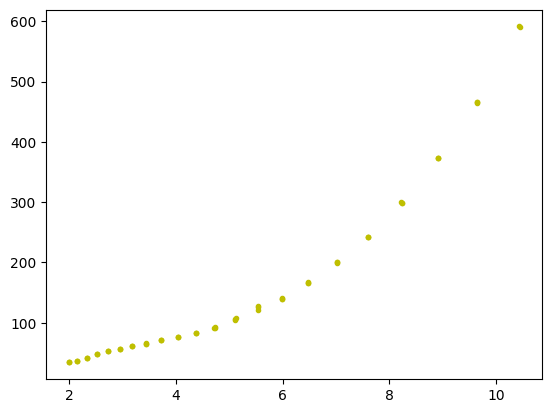

In [33]:
plt.figure()
plt.plot(temperature[0:65], sample_HC[0:65],"y." ,label='Experimental data')

In [42]:
# Otimization

res = opt.curve_fit(theorical_hc, temperature[0:60], sample_HC[0:60], sigma=err_sample_HC[0:60], bounds = ([0, 1e-3, 1e-4],[50, 1, 1e-1]))
print(res)

(array([15.82201283,  0.25375083,  0.1       ]), array([[ 1.90402908e+00, -3.66756805e-02, -1.29198790e+00],
       [-3.66756805e-02,  8.06816792e-04,  2.40763678e-02],
       [-1.29198790e+00,  2.40763678e-02,  9.04274841e-01]]))


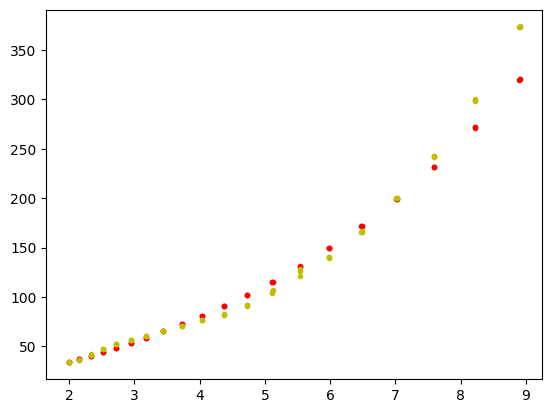

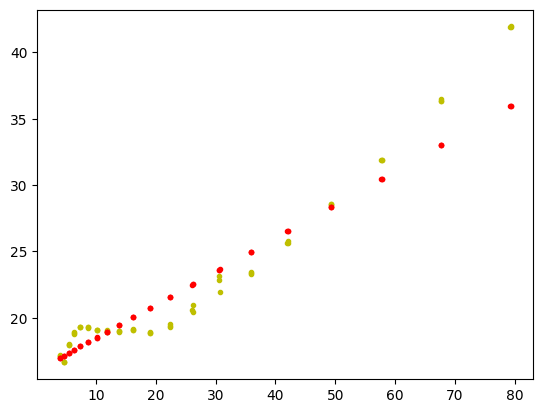

In [45]:
plt.figure()
plt.plot(temperature[0:60], theorical_hc(temperature[0:60], *res[0]), 'r.', label='Theoretical fit')
plt.plot(temperature[0:60], sample_HC[0:60],"y." ,label='Experimental data')

plt.figure()
plt.plot(squared_temperature[0:60], C_div_T[0:60], "y.", label='Experimental data')
plt.plot(squared_temperature[0:60], theorical_hc(temperature[0:60], *res[0])/temperature[0:60], 'r.', label='Theoretical fit')

# Don't fit with C(T)...

In [75]:
def fit_func(x, beta, gamma, n) :
    k = 1.380649e-23
    delta = 2.9461005*k*2.4
    r = 8.31446261815324
    phonon = beta * x
    y = delta/(k*np.sqrt(x))
    schottky = (y**2)* np.exp(y)/((np.exp(y) + 1)**2)
    return phonon + gamma + n*r*1e3*schottky/np.sqrt(x)

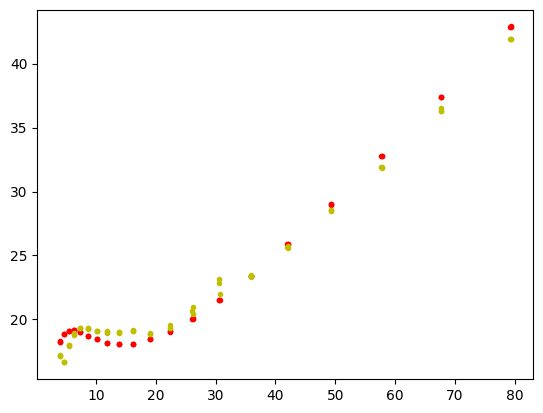

In [93]:
plt.figure()
plt.plot(squared_temperature[0:60], fit_func(squared_temperature[0:60], 0.5, 2, 0.01), ".r")
plt.plot(squared_temperature[0:60], C_div_T[0:60], "y.", label='Experimental data')


(array([1.00000000e-01, 2.00681612e+01, 1.00000000e-04]), array([[ 4.02019322e-03, -2.34701986e-01,  1.66290306e-04],
       [-2.34701986e-01,  1.50962307e+01, -1.10063109e-02],
       [ 1.66290306e-04, -1.10063109e-02,  8.53325204e-06]]))


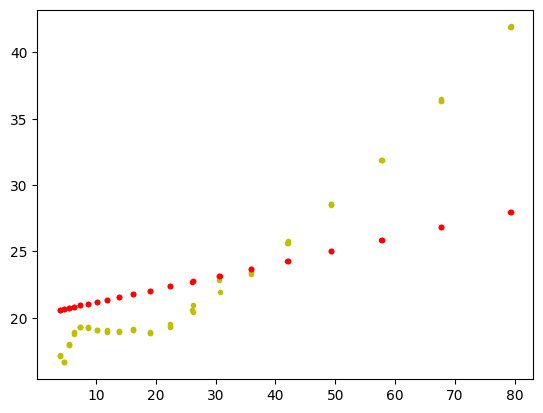

In [80]:
res2 = opt.curve_fit(fit_func, squared_temperature[0:60], C_div_T[0:60], bounds = ([1e-5, 0, 1e-4],[0.1, 50, 1]))

print(res2)

plt.figure()
plt.plot(squared_temperature[0:60], C_div_T[0:60], "y.", label='Experimental data')
plt.plot(squared_temperature[0:60], fit_func(squared_temperature[0:60], *res2[0]), 'r.', label='Theoretical fit')